In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
upladed = files.upload()

Saving district wise rainfall normal.csv to district wise rainfall normal.csv


In [ ]:
dataset=pd.read_csv("district wise rainfall normal.csv",encoding = "ISO-8859-1")
dataset.dtypes

STATE_UT_NAME     object
DISTRICT          object
JAN              float64
FEB              float64
MAR              float64
APR              float64
MAY              float64
JUN              float64
JUL              float64
AUG              float64
SEP              float64
OCT              float64
NOV              float64
DEC              float64
ANNUAL           float64
Jan-Feb          float64
Mar-May          float64
Jun-Sep          float64
Oct-Dec          float64
dtype: object

In [ ]:
groups = dataset.groupby('STATE_UT_NAME')['DISTRICT','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
data=groups.get_group(('WEST BENGAL'))
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
86,COOCH BEHAR,8.9,16.0,32.2,138.9,345.4,668.8,864.9,733.0,470.9,15.1,8.3
87,DARJEELING,48.3,33.8,57.7,130.5,262.3,534.7,756.9,645.9,502.8,16.8,9.9
88,JALPAIGURI,9.2,17.8,39.7,119.3,339.3,667.3,931.4,670.9,488.3,18.0,7.2
89,MALDA,13.6,10.5,14.5,34.8,106.2,216.6,332.9,284.8,283.0,13.2,6.8
90,SOUTH DINAJPUR,8.9,13.3,19.0,58.9,167.8,289.3,368.9,248.0,279.7,13.0,5.6
91,NORTH DINAJPUR,21.5,2.0,8.0,35.7,162.9,316.0,367.0,307.7,403.8,9.1,3.2
96,BANKURA,12.0,18.0,22.0,36.3,66.9,215.0,303.2,290.7,242.3,9.8,9.5
97,BIRBHUM,13.4,16.1,21.2,30.9,78.7,222.3,313.9,298.8,271.0,15.8,5.6
98,BURDWAN,10.7,22.2,19.8,37.8,78.8,198.2,294.1,285.3,251.1,11.4,6.0
99,HOOGHLY,11.9,26.6,28.2,50.6,108.5,243.4,316.1,265.1,243.3,16.0,6.9


In [ ]:
data=data.melt(['DISTRICT']).reset_index()
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


,index,DISTRICT,variable,value
0,0,COOCH BEHAR,index,0
1,1,DARJEELING,index,1
2,2,JALPAIGURI,index,2
3,3,MALDA,index,3
4,4,SOUTH DINAJPUR,index,4


In [ ]:
df= data[['DISTRICT','variable','value']].reset_index().sort_values(by=['DISTRICT','index'])
df.head()

,index,DISTRICT,variable,value
6,6,BANKURA,JAN,12.0
25,25,BANKURA,FEB,18.0
44,44,BANKURA,MAR,22.0
63,63,BANKURA,APR,36.3
82,82,BANKURA,MAY,66.9


In [ ]:
df.columns=['INDEX','District','Month','avg_rainfall']

In [ ]:
df.head()

,INDEX,District,Month,avg_rainfall
6,6,BANKURA,JAN,12.0
25,25,BANKURA,FEB,18.0
44,44,BANKURA,MAR,22.0
63,63,BANKURA,APR,36.3
82,82,BANKURA,MAY,66.9


In [ ]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,District,Month,avg_rainfall
6,6,BANKURA,NaN,12.0
25,25,BANKURA,NaN,18.0
44,44,BANKURA,NaN,22.0
63,63,BANKURA,NaN,36.3
82,82,BANKURA,NaN,66.9
101,101,BANKURA,NaN,215.0
120,120,BANKURA,NaN,303.2
139,139,BANKURA,NaN,290.7
158,158,BANKURA,NaN,242.3
177,177,BANKURA,NaN,9.8


In [ ]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
6,12.0
25,18.0
44,22.0
63,36.3
82,66.9


In [ ]:
series=dataset
series.head()
series.shape

(209, 1)

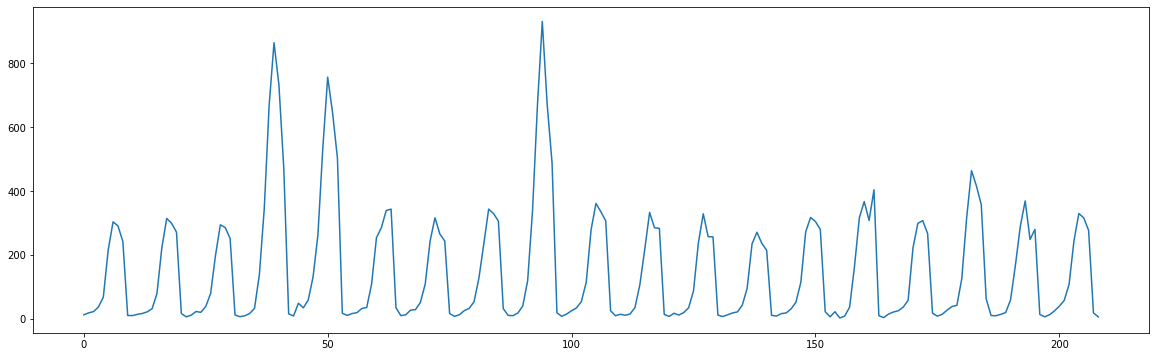

In [ ]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

In [ ]:
data_raw = series.values.astype("float32")
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)
dataset[0:5]

array([[0.01075963],
       [0.01721541],
       [0.02151926],
       [0.03690553],
       [0.06982999]], dtype=float32)

In [ ]:
TRAIN_SIZE = 0.80
train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (167, 42)


In [ ]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [ ]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(165, 1)
New training data shape:
(165, 1, 1)


In [ ]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(2000, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid"))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 10,  
              batch_size = 64, 
              )
    
    return(model)
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/10
3/3 [==============================] - 6s 579ms/step - loss: 0.0453
Epoch 2/10
3/3 [==============================] - 2s 613ms/step - loss: 0.0270
Epoch 3/10
3/3 [==============================] - 2s 607ms/step - loss: 0.0205
Epoch 4/10
3/3 [==============================] - 2s 621ms/step - loss: 0.0218
Epoch 5/10
3/3 [==============================] - 2s 619ms/step - loss: 0.0188
Epoch 6/10
3/3 [==============================] - 2s 610ms/step - loss: 0.0183
Epoch 7/10
3/3 [==============================] - 2s 606ms/step - loss: 0.0209
Epoch 8/10
3/3 [==============================] - 2s 619ms/step - loss: 0.0188
Epoch 9/10
3/3 [==============================] - 2s 602ms/step - loss: 0.0192
Epoch 10/10
3/3 [==============================] - 2s 610ms/step - loss: 0.0186


In [ ]:
import math
def predict_and_score(model, X, Y):
    pred = scaler.inverse_transform(model.predict(X))
    orig_data = scaler.inverse_transform([Y])
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)
print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 123.82 RMSE
Test data score: 103.48 RMSE


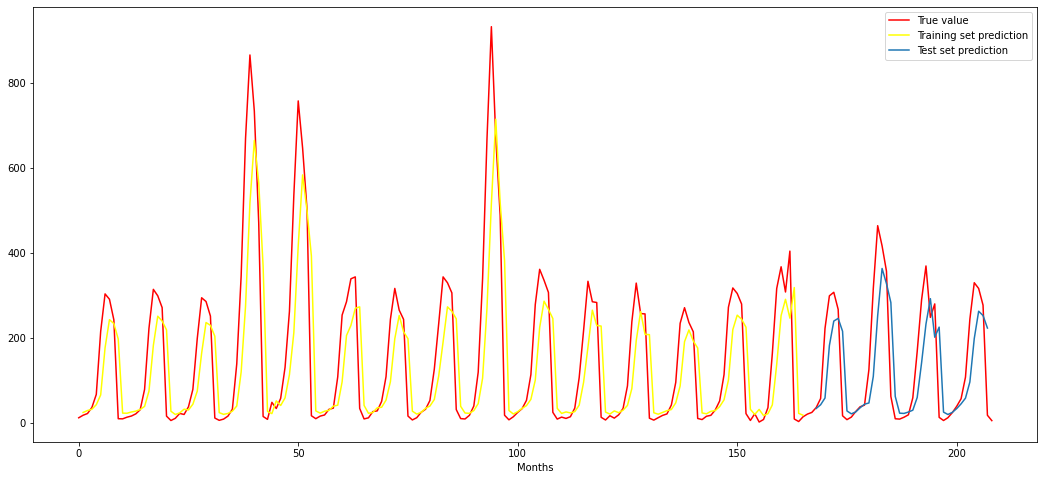

In [ ]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")
plt.legend()
plt.show()

In [ ]:
test_predict

array([[ 33.99382 ],
       [ 42.608215],
       [ 58.489338],
       [181.9706  ],
       [239.3816  ],
       [245.60298 ],
       [215.39668 ],
       [ 28.076246],
       [ 21.25995 ],
       [ 25.754202],
       [ 35.566864],
       [ 43.956573],
       [ 46.80314 ],
       [109.28455 ],
       [252.34915 ],
       [363.00494 ],
       [327.46545 ],
       [282.9335  ],
       [ 62.235004],
       [ 22.83293 ],
       [ 22.233702],
       [ 25.52948 ],
       [ 29.799078],
       [ 59.68794 ],
       [141.27936 ],
       [232.33583 ],
       [292.00436 ],
       [201.38127 ],
       [225.14035 ],
       [ 25.30477 ],
       [ 19.76189 ],
       [ 24.70553 ],
       [ 33.61928 ],
       [ 44.780586],
       [ 58.114773],
       [ 96.172874],
       [198.23357 ],
       [262.4687  ],
       [252.34912 ],
       [222.96674 ]], dtype=float32)